**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [2]:
# ENTER YOUR CODE HERE
import pandas as pd

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [2]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 79.0MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [3]:
# ENTER YOUR CODE HERE
from google.colab import files
uploaded= files.upload()

Saving nba_logreg.csv to nba_logreg (1).csv


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [4]:
#ENTER YOUR CODE HERE
df=pd.read_csv('nba_logreg.csv')
print(df.head())
print("columns are\n", df.columns)
print("Shape is\n", df.shape)

              Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]
columns are
 Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [6]:
#ENTER YOUR CODE HERE

In [7]:
print("columns are\n", df.columns)

columns are
 Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')


**What does the beginning of the dataset look like?**

In [ ]:
#ENTER YOUR CODE HERE

In [8]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [ ]:
#ENTER YOUR CODE HERE

In [9]:
#only 3p% columns is missing thus dropping those values
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV        

**What is the shape of the dataframe now?**

In [ ]:
#ENTER YOUR CODE HERE

In [10]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

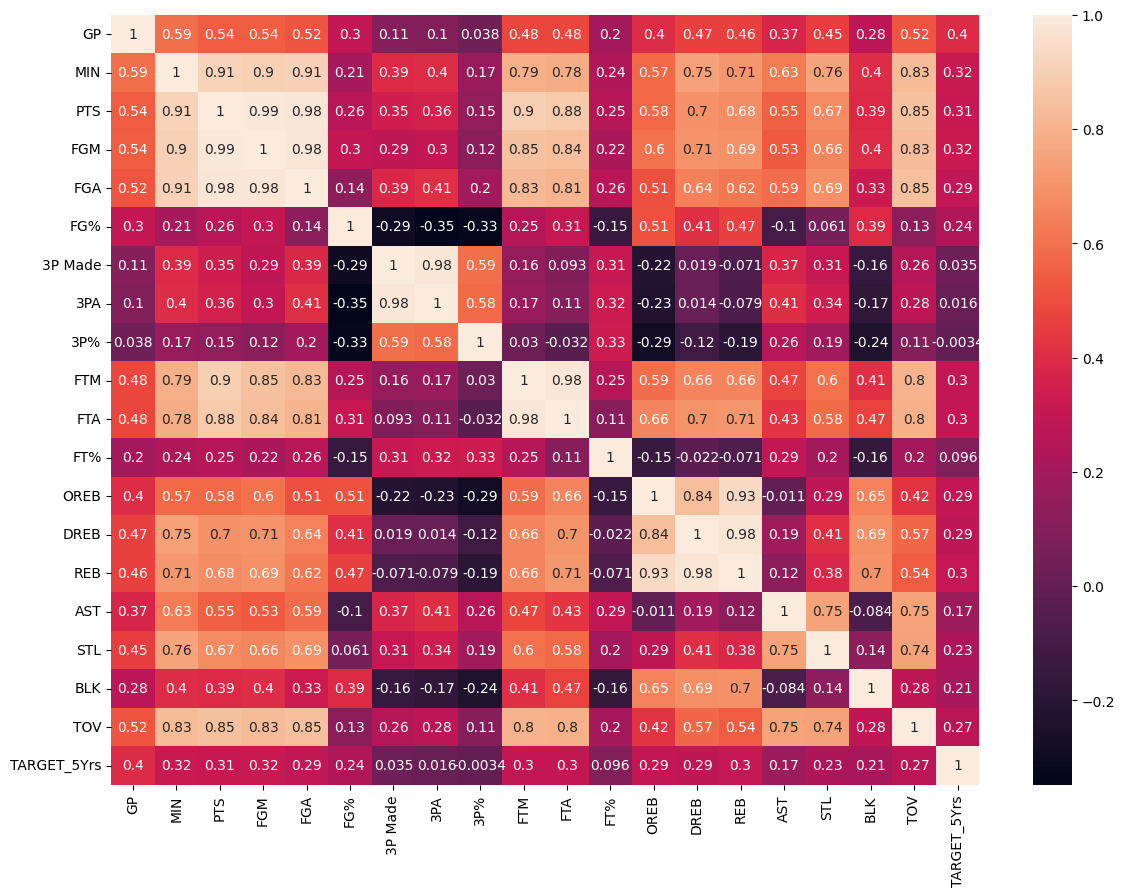

In [ ]:
#ENTER YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric= df.select_dtypes(include=['number'])
plt.figure(figsize=(14,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [11]:
#understanding dataset- Target_5YRS is the prediction
x = df.drop(['Name', 'TARGET_5Yrs'], axis=1)  # All features
y = df['TARGET_5Yrs']                         # Target label
print("The shape of the features dataframe is:", x.shape)
print("The shape of the labels dataframe is:", y.shape)

The shape of the features dataframe is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [12]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [13]:
#ENTER YOUR CODE HERE
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
print("The shape of training features dataframe is:", x_train.shape)
print("The shape of testing features dataframe is:", x_test.shape)
print("The shape of training labels dataframe is:", y_train.shape)
print("The shape of testing labels dataframe is:", y_train.shape)
print("Train/Test Split Ratio = ", len(x_train)/len(x_test))

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of testing labels dataframe is: (1063,)
Train/Test Split Ratio =  3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [17]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [18]:
#ENTER YOUR CODE HERE
model= LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


In [23]:
y_pred= model.predict(x_test)



Accuracy: 0.7518796992481203
Precision: 0.8089887640449438
Recall: 0.8181818181818182
F1 score: 0.8135593220338984


[link text](https://)-
- Accuracy:  0.7518796992481203
- F1 score:  0.8089887640449438
- Precision:  0.8181818181818182
- Recall:  0.8135593220338984

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [24]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Now test on the testing dataframe and print all of these metrics.**

In [26]:
#ENTER YOUR CODE HERE
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
print("F1 score of the model:", f1)
print("Precision of the model:", precision)
print("Recall pf the model:", recall)


Accuracy of the model: 0.7518796992481203
F1 score of the model: 0.8135593220338984
Precision of the model: 0.8089887640449438
Recall pf the model: 0.8181818181818182


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [32]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [44]:
#ENTER YOUR CODE HERE
model=SVC()
model.fit(x_train, y_train)

SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [45]:
#ENTER YOUR CODE HERE
y_pred= model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
print("F1 score of the model:", f1)
print("Precision of the model:", precision)
print("Recall of the model:", recall)

Accuracy of the model: 0.7443609022556391
F1 score of the model: 0.8131868131868132
Precision of the model: 0.7872340425531915
Recall of the model: 0.8409090909090909


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### MULTICLASS CLASSIFICATION

In [1]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 49.2MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [2]:
#ENTER YOUR CODE HERE
import pandas as pd
from google.colab import files
uploaded= files.upload()

Saving social_well_being.csv to social_well_being (1).csv


**Always analyse the data.**

In [3]:
#ENTER YOUR CODE HERE
df=pd.read_csv('social_well_being.csv')
df.info()
print("\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB

    User_ID  Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0        1   25      Female  Instagram                         120   
1        2   30        Male   

In [4]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [5]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [6]:
#ENTER YOUR CODE HERE
print("The classes are: ", df['Dominant_Emotion'].unique())

The classes are:  ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


In [7]:
df['Dominant_Emotion'].value_counts()

,count
Dominant_Emotion,
Happiness,186
Neutral,184
Anxiety,156
Sadness,146
Boredom,130
Anger,122


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [8]:
#ENTER YOUR CODE HERE
print("The genders are: ", df['Gender'].unique())
print("The platforms are: ", df['Platform'].unique())

The genders are:  ['Female' 'Male' 'Non-binary']
The platforms are:  ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [9]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [10]:
#ENTER YOUR CODE HERE
#ENTER YOUR CODE HERE

encoder = OneHotEncoder(sparse_output=False, drop='first')

one_hot_encoded = encoder.fit_transform(df[['Gender', 'Platform']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Gender', 'Platform']))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(['Gender', 'Platform'], axis=1)
df_encoded


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,Happiness,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,30,90,5,20,25,30,Anger,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,22,60,2,15,5,20,Neutral,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,28,200,8,100,30,50,Anxiety,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,33,45,1,5,2,10,Boredom,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
920,997,22,70,1,14,6,10,Neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,998,35,110,3,50,25,25,Happiness,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
922,999,28,60,2,18,8,18,Anger,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


**Repeat the drill for the column 'Platform'.**

In [11]:
#ENTER YOUR CODE HERE

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [12]:
#ENTER YOUR CODE HERE
import pandas as pd
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [13]:
#ENTER YOUR CODE HERE
label_encoder= LabelEncoder()
df_encoded['Dominant_Emotion']= label_encoder.fit_transform(df_encoded['Dominant_Emotion'])
df_encoded

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,30,90,5,20,25,30,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,22,60,2,15,5,20,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,28,200,8,100,30,50,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,33,45,1,5,2,10,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
920,997,22,70,1,14,6,10,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,998,35,110,3,50,25,25,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
922,999,28,60,2,18,8,18,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [15]:
#ENTER YOUR CODE HERE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = df_encoded.drop('Dominant_Emotion', axis=1)
y = df_encoded['Dominant_Emotion']
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.2, random_state=42)



In [16]:
print("The shape of training features dataframe is: ", x_train.shape)
print("The shape of testing features dataframe is: ", x_test.shape)
print("The shape of training labels dataframe is: ", y_train.shape)
print("The shape of testing labels dataframe is: ", y_train.shape)
print("The train-to-test split ratio is: ", len(x_train)/len(x_test) )

The shape of training features dataframe is:  (739, 15)
The shape of testing features dataframe is:  (185, 15)
The shape of training labels dataframe is:  (739,)
The shape of testing labels dataframe is:  (739,)
The train-to-test split ratio is:  3.9945945945945946


**Import the module used for training a KNN model.**

In [17]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier


**Train your model.**

In [18]:
#ENTER YOUR CODE HERE
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [19]:
#ENTER YOUR CODE HERE
y_pred= knn_model.predict(x_test)
print(y_pred)


[0 0 2 3 4 1 4 1 4 2 0 4 2 3 1 1 1 4 3 3 1 2 1 3 2 4 0 1 0 4 1 5 0 3 0 1 5
 3 5 4 5 0 5 4 3 4 4 0 3 2 5 1 1 5 3 0 1 4 1 3 1 3 0 1 3 3 3 1 4 3 4 2 2 1
 4 3 4 3 0 5 5 4 5 0 3 3 0 0 5 3 1 4 0 5 4 3 3 5 3 5 5 1 2 3 4 3 5 4 2 4 2
 3 3 3 0 4 4 4 4 5 0 0 1 0 5 4 3 1 2 0 3 1 5 2 1 3 4 3 5 3 1 2 2 3 4 4 0 5
 4 3 4 1 4 4 0 0 1 4 1 3 2 5 3 4 2 3 4 3 5 1 0 1 3 2 5 1 5 5 5 3 2 1 0 5 3]


In [20]:
predicted_df= pd.DataFrame({'Dominant_Emotion_Encoded_Predicted': y_pred})
predicted_df

,Dominant_Emotion_Encoded_Predicted
0,0
1,0
2,2
3,3
4,4
...,...
180,2
181,1
182,0
183,5


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [21]:
#ENTER YOUR CODE HERE
original_emotions = label_encoder.inverse_transform(y_pred)
original_emotions

array(['Anger', 'Anger', 'Boredom', 'Happiness', 'Neutral', 'Anxiety',
       'Neutral', 'Anxiety', 'Neutral', 'Boredom', 'Anger', 'Neutral',
       'Boredom', 'Happiness', 'Anxiety', 'Anxiety', 'Anxiety', 'Neutral',
       'Happiness', 'Happiness', 'Anxiety', 'Boredom', 'Anxiety',
       'Happiness', 'Boredom', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Anxiety', 'Sadness', 'Anger', 'Happiness', 'Anger',
       'Anxiety', 'Sadness', 'Happiness', 'Sadness', 'Neutral', 'Sadness',
       'Anger', 'Sadness', 'Neutral', 'Happiness', 'Neutral', 'Neutral',
       'Anger', 'Happiness', 'Boredom', 'Sadness', 'Anxiety', 'Anxiety',
       'Sadness', 'Happiness', 'Anger', 'Anxiety', 'Neutral', 'Anxiety',
       'Happiness', 'Anxiety', 'Happiness', 'Anger', 'Anxiety',
       'Happiness', 'Happiness', 'Happiness', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Boredom', 'Boredom', 'Anxiety', 'Neutral',
       'Happiness', 'Neutral', 'Happiness', 'Anger', 'Sadness', 'Sadness',

['Sadness' 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Sadness' 'Anxiety'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Sadness' 'Anxiety' 'Happiness'
 'Sadness' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Sadness' 'Happiness'
 'Neutral' 'Anxiety' 'Sadness' 'Boredom' 'Anger' 'Happiness' 'Anxiety'
 'Happiness' 'Anxiety' 'Neutral' 'Happiness' 'Happiness' 'Anxiety'
 'Sadness' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Neutral' 'Anxiety'
 'Neutral' 'Happiness' 'Happiness' 'Happiness' 'Neutral' 'Sadness'
 'Sadness' 'Happiness' 'Sadness' 'Boredom' 'Sadness' 'Anger' 'Happiness'
 'Sadness' 'Sadness' 'Happiness' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Anger' 'Neutral' 'Neutral' 'Neutral' 'Happiness' 'Anxiety'
 'Anxiety' 'Happiness' 'Happiness' 'Anger' 'Boredom' 'Neutral' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Anger' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Happiness' 'Anxiety' 'Sadness' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Ange

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [22]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy= accuracy_score(y_test, y_pred)
print("Accuracy if model is", accuracy)

Accuracy if model is 0.9243243243243243


Accuracy of the model is: 0.9837837837837838


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [23]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix is:")
print(cm)

# Classification report
print("The classification report is:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


The confusion matrix is:
[[24  2  0  0  0  3]
 [ 1 29  2  0  3  0]
 [ 0  0 17  0  1  0]
 [ 0  0  0 43  0  0]
 [ 1  1  0  0 33  0]
 [ 0  0  0  0  0 25]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.92      0.83      0.87        29
     Anxiety       0.91      0.83      0.87        35
     Boredom       0.89      0.94      0.92        18
   Happiness       1.00      1.00      1.00        43
     Neutral       0.89      0.94      0.92        35
     Sadness       0.89      1.00      0.94        25

    accuracy                           0.92       185
   macro avg       0.92      0.92      0.92       185
weighted avg       0.93      0.92      0.92       185



The cofusion matrix is:
[[22  0  0  0  0  0]
 [ 0 32  0  0  0  1]
 [ 0  0 15  0  0  1]
 [ 0  0  0 47  0  0]
 [ 0  1  0  0 35  0]
 [ 0  0  0  0  0 31]]
The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       0.97      0.97      0.97        33
     Boredom       1.00      0.94      0.97        16
   Happiness       1.00      1.00      1.00        47
     Neutral       1.00      0.97      0.99        36
     Sadness       0.94      1.00      0.97        31

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [24]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB


**Now instantiate and fit a model.**

In [25]:
#ENTER YOUR CODE HERE
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [26]:
#ENTER YOUR CODE HERE
# predicting encoded labels on test data
y_pred_nb = nb_model.predict(x_test)

#back to original emotion labels
original_emotions_nb = label_encoder.inverse_transform(y_pred_nb)


print(original_emotions_nb[:10])


['Anger' 'Anger' 'Boredom' 'Happiness' 'Boredom' 'Sadness' 'Boredom'
 'Anger' 'Anger' 'Boredom']


**Finally, print the accuracy, confusion matrix and classification report.**

In [27]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the model is:", accuracy)

cm = confusion_matrix(y_test, y_pred_nb)
print("The cofusion matrix is:")
print(cm)

cr = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_)
print("The classification report is:")
print(cr)


Accuracy of the model is: 0.42702702702702705
The cofusion matrix is:
[[23  0  2  4  0  0]
 [ 5  0 17 11  0  2]
 [ 3  0 15  0  0  0]
 [ 5  0  0 37  0  1]
 [ 9  0 20  4  0  2]
 [10  0 10  1  0  4]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.42      0.79      0.55        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.23      0.83      0.37        18
   Happiness       0.65      0.86      0.74        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.44      0.16      0.24        25

    accuracy                           0.43       185
   macro avg       0.29      0.44      0.31       185
weighted avg       0.30      0.43      0.33       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is: 0.4540540540540541
The cofusion matrix is:
[[18  0  3  1  0  0]
 [ 6  0 14  9  0  4]
 [ 1  0 15  0  0  0]
 [ 1  0  0 44  0  2]
 [ 4  0 22  6  0  4]
 [14  0  9  1  0  7]]
The classification report is:
              precision    recall  f1-score   support

       Anger       0.41      0.82      0.55        22
     Anxiety       0.00      0.00      0.00        33
     Boredom       0.24      0.94      0.38        16
   Happiness       0.72      0.94      0.81        47
     Neutral       0.00      0.00      0.00        36
     Sadness       0.41      0.23      0.29        31

    accuracy                           0.45       185
   macro avg       0.30      0.49      0.34       185
weighted avg       0.32      0.45      0.35       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)


y_pred_dt_labels = label_encoder.inverse_transform(y_pred_dt)

# Accuracy score
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9621621621621622


In [29]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)

# Accuracy score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9891891891891892


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

ACCURACY SCORES:
Decision tree: 0.9621621621621622,
Random forest: 0.9891891891891892

# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded= files.upload()
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

Saving mnist_test.csv to mnist_test.csv
Saving mnist_train.csv to mnist_train.csv


In [1]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

NameError: name 'train' is not defined

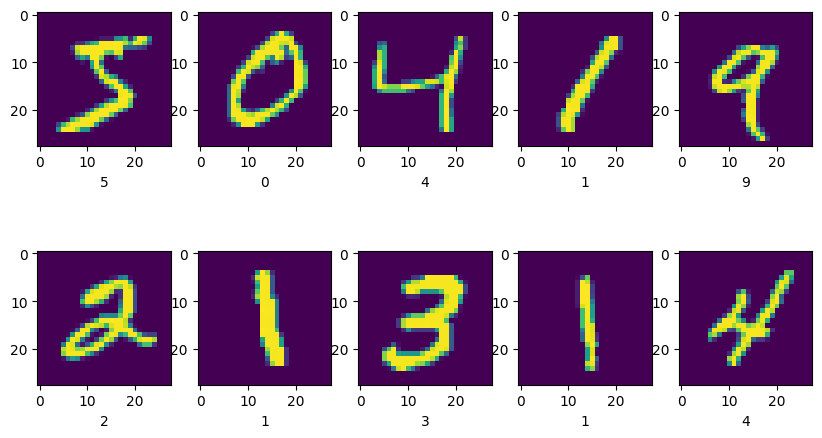

In [5]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 4= 240653%4= 1= softmax
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [7]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    pass


  def softmax(self, Z):
    # Implement the softmax activation function
    #subtracting max value to prevent large exponentials
    Z_max = np.max(Z)
    exp_values = np.exp(Z - Z_max)

    # taking out sum of exponential
    sum_exp = np.sum(exp_values)

    #probabilities
    result = exp_values / sum_exp
    return result

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    pass
  def one_hot_encode(self, y):
    # Implement one hot encoding
    pass

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    pass

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    #implement train
    pass

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [ ]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration: 100, Loss: nan
Iteration: 200, Loss: nan
Iteration: 300, Loss: nan
Iteration: 400, Loss: nan
Iteration: 500, Loss: nan
Iteration: 600, Loss: nan
Iteration: 700, Loss: nan
Iteration: 800, Loss: nan
Iteration: 900, Loss: nan
Iteration: 1000, Loss: nan
Iteration: 1100, Loss: nan
Iteration: 1200, Loss: nan
Iteration: 1300, Loss: nan
Iteration: 1400, Loss: nan
Iteration: 1500, Loss: nan
Iteration: 1600, Loss: nan
Iteration: 1700, Loss: nan
Iteration: 1800, Loss: nan
Iteration: 1900, Loss: nan
Iteration: 2000, Loss: nan
Iteration: 2100, Loss: nan
Iteration: 2200, Loss: nan
Iteration: 2300, Loss: nan
Iteration: 2400, Loss: nan
Iteration: 2500, Loss: nan
Iteration: 2600, Loss: nan
Iteration: 2700, Loss: nan
Iteration: 2800, Loss: nan
Iteration: 2900, Loss: nan
Iteration: 3000, Loss: nan
Iteration: 3100, Loss: nan
Iteration: 3200, Loss: nan
Iteration: 3300, Loss: nan
Iteration: 3400, Loss: nan
Iteration: 3500, Loss: nan
Iteration: 3600, Loss: nan
Iteration: 3700, Loss: nan
Iteration:

In [ ]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 9.393414211438476 %


3


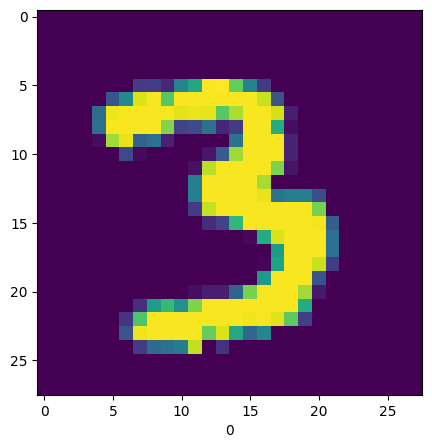

In [ ]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
